In [1]:
from simulate_wizard import Game
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
import numpy as np

def save_data():

    distribtions = []

    for n_players in range(3, 8):
        for n_cards in range(1,20):
            if n_cards * n_players <= 59:
                results = []
                for _ in range(10_000):
                    a_game = Game(n_players=n_players,n_cards=n_cards)
                    res = a_game.compute_results()
                    results.extend(res)

                save_name = f'data/records_{n_players}_{n_cards}.csv'
                df = pd.DataFrame.from_records(results)
                df.to_csv(save_name)
                distribtions.append((n_cards,n_players, df['n_won'].value_counts(normalize=True).values*100))

# Answer questions

Given amoung hands with a wizard what is the optimal bet?

In [ ]:
def count_trump(hand, trump):
    # might want to opimize
    n_trump = 0
    for card in hand:
        if trump == card.suit:
            n_trump +=1
    return n_trump

In [25]:
def simulate_games( n_players, n_cards,n_games=1_000_000):
    results = []
    for _ in range(n_games):
                    a_game = Game(n_players=n_players,n_cards=n_cards)
                    res = a_game.compute_results()
                    results.extend(res)

    df = pd.DataFrame.from_records(results)
    df['n_trump'] = df.apply(lambda row: count_trump(hand=row['hand'],
                                                    trump=row['trump']), axis=1)
    return df

         n_players  n_cards  n_won   trump  \
0                3        5      2   clubs   
1                3        5      0   clubs   
2                3        5      3   clubs   
3                3        5      2  hearts   
4                3        5      3  hearts   
...            ...      ...    ...     ...   
2999995          3        5      1    None   
2999996          3        5      0    None   
2999997          3        5      2  spades   
2999998          3        5      2  spades   
2999999          3        5      1  spades   

                                                      hand  n_trump  
0        [3-diamonds, 9-hearts, 13-diamonds, 3-spades, ...        0  
1        [5-diamonds, 8-hearts, 11-hearts, 7-spades, je...        0  
2        [9-spades, 5-clubs, 7-hearts, 12-clubs, 2-diam...        2  
3         [4-spades, 14-hearts, 8-clubs, 2-hearts, wizard]        2  
4        [10-hearts, 13-clubs, jester, 14-clubs, 13-hea...        2  
...                        

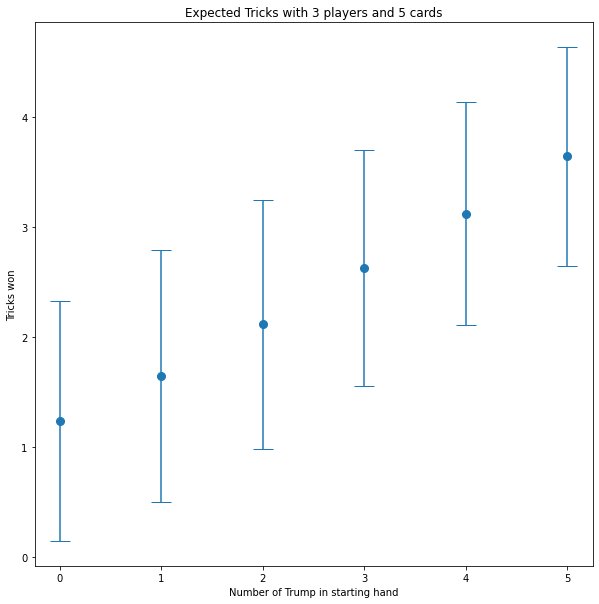

In [30]:
def compute_optimal_bets(df):
    n_cards = df['n_cards'].unique()[0]
    n_players = df['n_players'].unique()[0]
    n_cards= df['n_cards'].unique()[0]
    optimal_bets = []

    for n_trump in range(0,n_cards+1):
        subset_df = df[df['n_trump']==n_trump]
        optimal_bets.append({
            'n_trump' : n_trump,
            'mean_tricks_won': subset_df['n_won'].mean(),
            'std_tricks_won': subset_df['n_won'].std(),
            })

    optimal_bets = pd.DataFrame.from_records(optimal_bets)
    print(optimal_bets.shape)
    return optimal_bets, n_players, n_cards

def plot_optimal_bets(optimal_bets, n_players, n_cards):

    plt.errorbar(x=optimal_bets['n_trump'],
                y=optimal_bets['mean_tricks_won'],
                yerr=optimal_bets['std_tricks_won'],
                fmt='o', markersize=8, capsize=10)

    plt.title(f'Expected Tricks with {n_players} players and {n_cards} cards')
    plt.ylabel("Tricks won")
    plt.xlabel('Number of Trump in starting hand')
    plt.show()


df = simulate_games(3, 5)
print(df)
optimal_bets, n_players, n_cards = compute_optimal_bets(df)
plot_optimal_bets(optimal_bets, n_players, n_cards)

(6, 3)


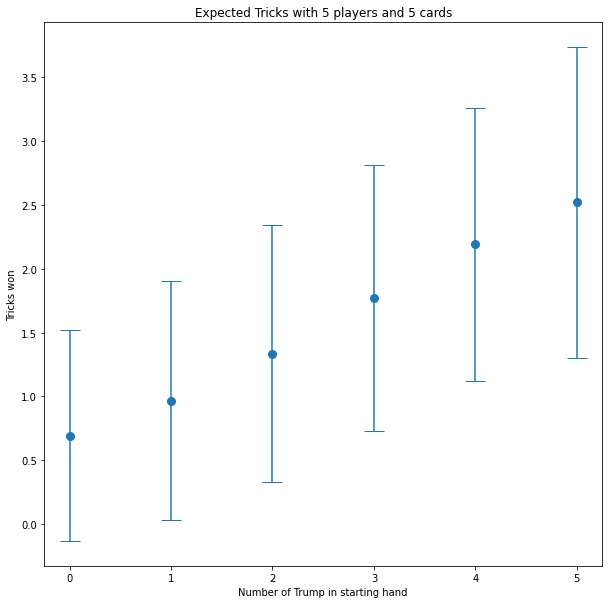

In [33]:
df = simulate_games(n_players=5,n_cards=5, n_games=100_000)
optimal_bets, n_players, n_cards = compute_optimal_bets(df)
plot_optimal_bets(optimal_bets, n_players, n_cards)

(6, 3)


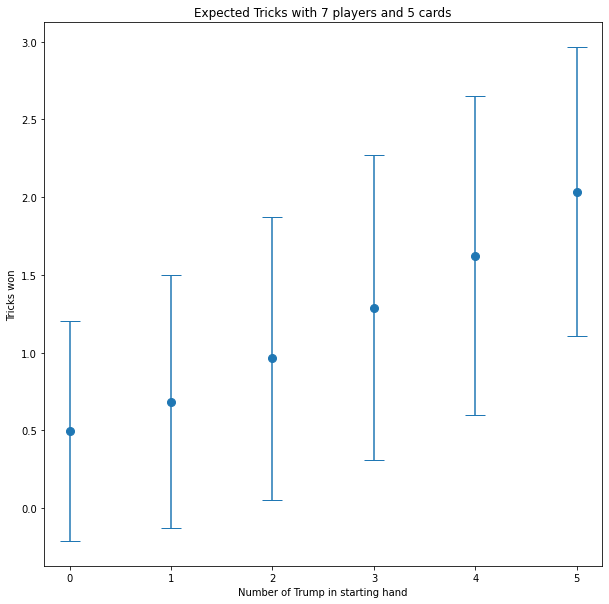

In [34]:
df = simulate_games(n_players=7,n_cards=5, n_games=100_000)
optimal_bets, n_players, n_cards = compute_optimal_bets(df)
plot_optimal_bets(optimal_bets, n_players, n_cards)

(6, 3)


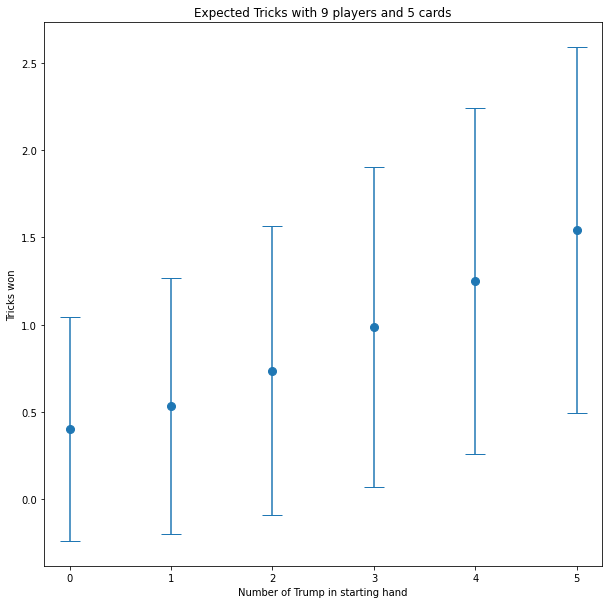

In [35]:
df = simulate_games(n_players=9,n_cards=5, n_games=100_000)
optimal_bets, n_players, n_cards = compute_optimal_bets(df)
plot_optimal_bets(optimal_bets, n_players, n_cards)

(11, 3)


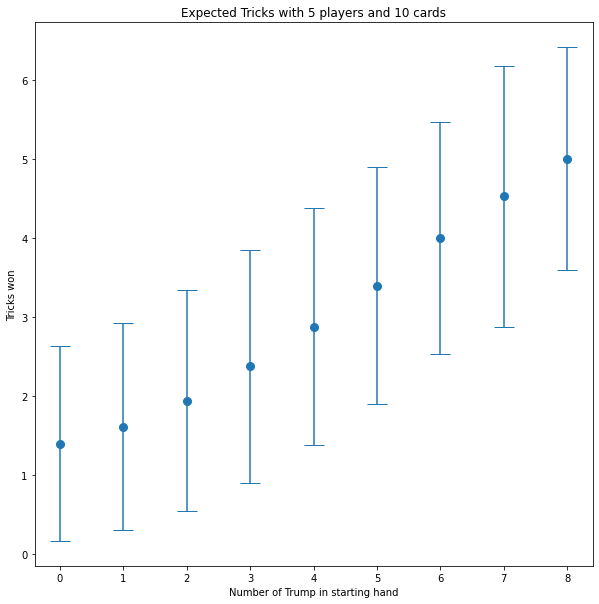

In [36]:
df = simulate_games(n_players=5,n_cards=10, n_games=100_000)
optimal_bets, n_players, n_cards = compute_optimal_bets(df)
plot_optimal_bets(optimal_bets, n_players, n_cards)